<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml20_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Neural Netowrk, 순환 신경망)

시계열 데이터, 텍스트 데이터와 같이 순서가 중요한 데이터(순차 데이터, sequence)를 다룰 때 많이 사용하는 신경망.

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

# 단어 수준 one-hot encoding

## 단어-인덱스 매핑

In [2]:
sentence = 'The cat sat on the table.'

In [3]:
word_index = {}  # 단어를 키로 하고, 숫자를 값(value)로 저장할 dict
for word in sentence.split():  # 하나의 문장 공백으로 구분된 단어 리스트에서 반복하면서
    if word not in word_index:  # 단어가 dict에 없다면,
        word_index[word] = len(word_index) + 1
print(word_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'table.': 6}


In [4]:
samples = ['The cat sat on the table.', 'The dog ate my laptop.']

In [5]:
# samples 리스트에 등장하는 단어들의 word-index 사전을 만드세요.
word_index = {}
for s in samples:
    for w in s.split():
        if w not in word_index:
            word_index[w] = len(word_index) + 1
print(word_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'table.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'laptop.': 10}


## 텍스트를 숫자들의 리스트로 변환

In [6]:
samples_to_sequences = []  # 숫자들의 리스트를 저장할 리스트
for s in samples:
    sequence = []  # 하나의 문장을 숫자들로 변환한 리스트
    for w in s.split():
        sequence.append(word_index[w])  # 사전에서 단어에 매핑된 인덱스를 찾아서 리스트에 추가.
    samples_to_sequences.append(sequence)

print(samples_to_sequences)
#> [[1, 2, 3, 4, 5, 6], [1, 7, 8, 9, 10]]

[[1, 2, 3, 4, 5, 6], [1, 7, 8, 9, 10]]


샘플 문장들마다 사용된 단어의 개수가 다르기 때문에 scikit-learn, keras 패키지의 모델들을 훈련시킬 수 없다.

## One-hot encoding

In [7]:
max_rows = 10  # 한 문장의 최대 단어 수
max_cols = max(word_index.values()) + 1  # word_index의 값 = column index
samples_1hot = np.zeros(shape=(len(samples), max_rows, max_cols))
for i, s in enumerate(samples):
    for j, w in list(enumerate(s.split()))[:max_rows]:
        index = word_index[w]
        samples_1hot[i, j, index] = 1

print(samples_1hot)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [8]:
print(word_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'table.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'laptop.': 10}


In [9]:
# 다른 one-hot encoding 방법: 사용된 단어 인덱스에는 1, 사용되지 않은 인덱스에는 0
max_cols = max(word_index.values()) + 1
samples_1hot_2 = np.zeros(shape=(len(samples), max_cols),
                          dtype=np.int32)
for i, s in enumerate(samples):
    for w in s.split()[:max_cols]:
        j = word_index[w]
        samples_1hot_2[i, j] = 1

print(samples_1hot_2)
#> [[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]]

[[0 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 1 1]]


# Tokenizer

In [10]:
samples

['The cat sat on the table.', 'The dog ate my laptop.']

In [11]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=1_000)
# 가장 빈도가 높은 1,000개의 단어만 선택하는 Tokenizer 객체를 생성.

In [12]:
tokenizer.fit_on_texts(samples)  # 단어 인덱스를 구축

In [13]:
tokenizer.word_index  #> {word: index} 사전(dict)

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'laptop': 9,
 'my': 8,
 'on': 4,
 'sat': 3,
 'table': 5,
 'the': 1}

In [14]:
tokenizer.index_word  #> {index: word} 사전(dict)

{1: 'the',
 2: 'cat',
 3: 'sat',
 4: 'on',
 5: 'table',
 6: 'dog',
 7: 'ate',
 8: 'my',
 9: 'laptop'}

In [15]:
tokenizer.word_counts  #> [(word, count)]

OrderedDict([('the', 3),
             ('cat', 1),
             ('sat', 1),
             ('on', 1),
             ('table', 1),
             ('dog', 1),
             ('ate', 1),
             ('my', 1),
             ('laptop', 1)])

In [16]:
# 문자열(텍스트)를 정수 인덱스들의 리스트로 변환 리턴.
tokenizer.texts_to_sequences(samples)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [17]:
# Tokenizer를 사용한 one-hot encoding
result = tokenizer.texts_to_matrix(samples)
result.shape  #> (n_sample, max_token)

(2, 1000)

In [18]:
result[:, :15]

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.]])

# IMDB dataset

In [19]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=500)
# IMDB 리뷰에서 가장 자주 등장하는 단어 500개를 어휘 사전(word index)로 사용하는 데이터 셋을 로드.

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [20]:
x_train_full.shape

(25000,)

In [21]:
x_train_full.dtype  #> object들을 원소로 갖는 1d array

dtype('O')

In [22]:
print(x_train_full[0])
#> x_train_full은 25,000개의 (정수) 리스트를 원소로 하는 1d 배열

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [23]:
y_train_full.shape

(25000,)

In [24]:
np.unique(y_train_full, return_counts=True)
#> 타겟: 0-부정, 1-긍정

(array([0, 1]), array([12500, 12500]))

In [25]:
x_test.shape  # 25,000개의 리스트를 원소로 갖는 1d 배열

(25000,)

In [26]:
y_test.shape  # 긍정/부정 리뷰

(25000,)

In [27]:
print(x_test[0])

[1, 2, 202, 14, 31, 6, 2, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 2]


*   0: padding
*   1: 문장의 시작
*   2: 어휘 사전에 없는 단어
*   인덱스: 어휘 사전의 인덱스

In [28]:
# 어휘 사전을 로드
word_index = keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [29]:
len(word_index)

88584

In [30]:
type(word_index)

dict

In [31]:

for i, (k, v) in enumerate(word_index.items()):
    print(k, ':', v)
    if i == 5:
        break

fawn : 34701
tsukino : 52006
nunnery : 52007
sonja : 16816
vani : 63951
woods : 1408


In [32]:
# word_index에서 index의 오름차순으로 6개 출력
sorted(word_index.items(), key=lambda x: x[1])[:6]

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6)]

## Train/Validation split

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  stratify=y_train_full,
                                                  random_state=42)

In [34]:
x_train.shape

(20000,)

In [35]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([10000, 10000]))

## 데이터 탐색

In [36]:
# 훈련 셋에 있는 각 리뷰의 길이(각 리뷰에서 사용된 단어 수)
review_lengths = pd.Series([len(x) for x in x_train])
print(review_lengths)

0        133
1        398
2        384
3        205
4        230
        ... 
19995     95
19996    138
19997    148
19998    138
19999    116
Length: 20000, dtype: int64


In [37]:
review_lengths.describe()

count    20000.000000
mean       238.493400
std        176.785035
min         11.000000
25%        130.000000
50%        178.000000
75%        290.000000
max       2494.000000
dtype: float64

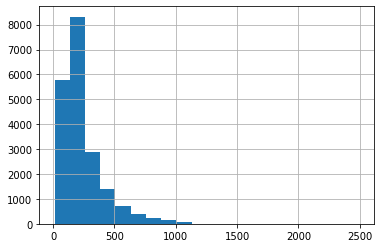

In [38]:
review_lengths.hist(bins=20)
plt.show()

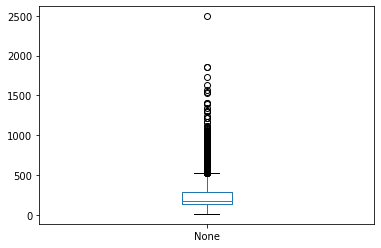

In [39]:
review_lengths.plot.box()
plt.show()

In [40]:
for review in x_train[:5]:
    print(review[:10])

[1, 2, 8, 135, 13, 28, 57, 326, 51, 363]
[1, 2, 2, 2, 18, 116, 9, 4, 2, 2]
[1, 14, 2, 2, 2, 201, 2, 2, 11, 4]
[1, 321, 123, 305, 7, 149, 4, 172, 154, 2]
[1, 2, 2, 2, 270, 11, 4, 2, 2, 7]


## 데이터 정제

샘플(IMDB 리뷰)마다 사용되는 단어 수가 다르기 때문에 훈련시키기 어려움.

샘플(리뷰)마다 100개의 단어(token)만 사용.
100개 이상의 단어가 사용되는 샘플은 잘라내고, 100개 미만의 단어가 사용되는 샘플들은 0으로 채움(padding).
>   `keras.preprocessing.sequence.pad_sequences()` 함수 사용


In [41]:
x_train_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_train, maxlen=100)
# pad_sequences() 함수의 parameter:
# maxlen: sequence의 최대 길이
# padding='pre': maxlen보다 길이가 짧은 시퀀스일 때 패딩을 앞에서부터 채움
# truncating='pre': maxlen보다 길이가 긴 시퀀스일 때 앞에서 자름.

In [43]:
x_train.shape  #> 1d array

(20000,)

In [42]:
x_train_seq.shape  #> 2d array

(20000, 100)

In [44]:
x_train[0][:10]  # 훈련 셋 중에서 첫번째 샘플(리뷰)의 첫 10개 단어

[1, 2, 8, 135, 13, 28, 57, 326, 51, 363]

In [45]:
x_train[0][-10:]  # 훈련 셋 중에서 첫번째 샘플(리뷰)의 마지막 10개 단어

[18, 399, 14, 8, 72, 25, 317, 72, 2, 53]

In [46]:
x_train_seq[0][:10]

array([  4,  20,   2,  21,   2,  92,   2, 178,  51,  75], dtype=int32)

In [47]:
x_train_seq[0][-10:]
#> 시퀀스가 잘릴 때는 앞에서 잘림.

array([ 18, 399,  14,   8,  72,  25, 317,  72,   2,  53], dtype=int32)

In [48]:
print(x_train_seq[19995])
#> 시퀀스에 패딩이 채워질 때는 앞에 채워짐.

[  0   0   0   0   0   1  13 244   6   2 194 337   7  91   7   4 108  15
  28  77 448  23   2   2   2  14  31   2  17  31   7   4   2   5  91   2
  10  10  13  28  43   2   2  12  18  44   4   2  58   5  13 131 169  12
 483   2  17  73  17   2  10  10   4 136 121   2   9  23   6 252   2 265
  19   4   2   2   9  31  63   2  46   5   4  57   2   2  34 117   2   2
   2   4 130   9   6   2   7   2  10  10]


검증 셋과 테스트 셋도 훈련 셋과 마찬가지로 자르거나 또는 패딩을 채워야 함.

In [49]:
x_val_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_val, maxlen=100)
x_val_seq.shape  #> (5000,) --> (5000, 100) 2d array

(5000, 100)

In [50]:
x_test_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_test, maxlen=100)
x_test_seq.shape # (25000,) --> (25000, 100) 2d array

(25000, 100)

NLP(Natural Language Processing, 자연어 처리)에서는 숫자(정수)가 신경망을 훈련시킬 때 사요됨. 그런데 예를 들어서 20번 단어가 10번 단어보다 더 중요할 이유는 없기 때문에, word index의 인덱스를 그대로 훈련 데이터로 사용하는 것은 좋은 방법이 아님. 해결 방법:
*   one-hot encoding
*   word embedding

In [51]:
x_train_1hot = keras.utils.to_categorical(x_train_seq)
#> x_train_seq: (20000, 100)  -->  x_train_1hot: (20000, 100, 500)

In [52]:
x_train_1hot.shape

(20000, 100, 500)

In [53]:
x_val_1hot = keras.utils.to_categorical(x_val_seq)
x_test_1hot = keras.utils.to_categorical(x_test_seq)

In [54]:
x_val_1hot.shape  #> (5000, 100, 500)

(5000, 100, 500)

In [56]:
x_test_1hot.shape  #> (25000, 100, 500)

(25000, 100, 500)

In [57]:
x_train_1hot

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.



---



In [ ]:
index_word = {v: k for k, v in word_index.items()}
index_word

In [60]:
print(x_train_full[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [63]:
for x in x_train_full[0]:
    if x == 2:
        print('?', end=' ')
    elif x > 2:
        print(index_word[x-3], end=' ')

this film was just ? ? ? ? story direction ? really ? the part they played and you could just ? being there ? ? is an amazing actor and now the same being director ? father came from the same ? ? as ? so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so ? and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and ? they were just ? children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all 



---



# RNN 생성, 훈련

## 모델 생성

In [64]:
model = keras.Sequential()

In [65]:
# 순환 층(recurrent layer): activation='tanh' - 기본값
model.add(keras.layers.SimpleRNN(units=8, input_shape=(100, 500)))
# 출력 층(output layer)
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


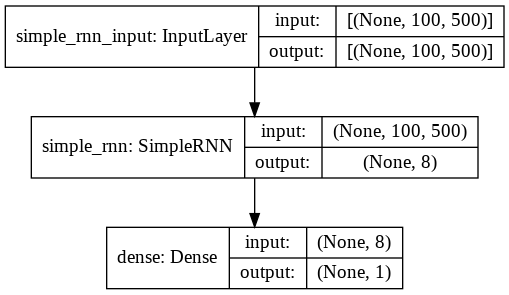

In [67]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일

In [68]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [69]:
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')

## 모델 훈련

In [ ]:
# 조기 종료 콜백
early_stop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 훈련 단계 저장 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('simplernn_h5', save_best_only=True)
# 콜백을 적용해서 모델 훈련
history = model.fit(x_train_1hot, y_train, batch_size=64, epochs=100,
                    callbacks=[early_stop_cb, checkpoint_cb],
                    validation_data=(x_val_1hot, y_val))

Epoch 1/100
313/313 [==============================] - 25s 69ms/step - loss: 0.7011 - accuracy: 0.5049 - val_loss: 0.6959 - val_accuracy: 0.5096
INFO:tensorflow:Assets written to: simplernn_h5/assets
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6936 - accuracy: 0.5183 - val_loss: 0.6886 - val_accuracy: 0.5374
INFO:tensorflow:Assets written to: simplernn_h5/assets
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6822 - accuracy: 0.5637 - val_loss: 0.6647 - val_accuracy: 0.6018
INFO:tensorflow:Assets written to: simplernn_h5/assets
Epoch 4/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6530 - accuracy: 0.6263 - val_loss: 0.6400 - val_accuracy: 0.6484
INFO:tensorflow:Assets written to: simplernn_h5/assets
Epoch 5/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6293 - accuracy: 0.6634 - val_loss: 0.6205 - val_accuracy: 0.6772
INFO:tensorflow:Assets written to: simplernn_h5/assets
